In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

import recursive as sv
import pickle
from os import path
import pandas as pd

import matplotlib.cm as cm

In [2]:
data_path = path.join(*(['..']*3+['data','time_series_linear_interpolations']))
path.exists(data_path)

True

In [3]:
with open(path.join(data_path,'olap3.pickle'),'rb') as a:
    svdata = pickle.load(a)

In [4]:
two_session_data_by_group = [
    (gr_id,dat.sessions[1], dat.sessions[3]) 
    for gr_id,dat in zip(svdata.group_id,svdata.coupling_2d.remez.tolist()) 
    if dat is not None
]

In [5]:
two_session_data_by_group[0]

(1001,
 [0.3352266190463019, 1.47206166533493],
 [0.30865236229458465, 1.5412726626724513])

In [22]:
drum_score_by_group = {
    gr_id: drum_signal_score.sessions[3]._data
    for gr_id, drum_signal_score in zip(svdata.group_id, svdata.drum_signal_scores.tolist())
}

In [23]:
drum_score_by_group[1001]

{'drumming_pair_scores': [0.6326521444158876,
  0.575596290552415,
  0.726632104581565],
 'drumming_mean_score': 0.6449601798499559,
 'drumming_group_score': 0.4426226904675891}

In [14]:
len(svdata.coupling_2d.remez.tolist()), len(svdata.group_id.tolist()), len(drum_score_by_group)

(48, 48, 48)

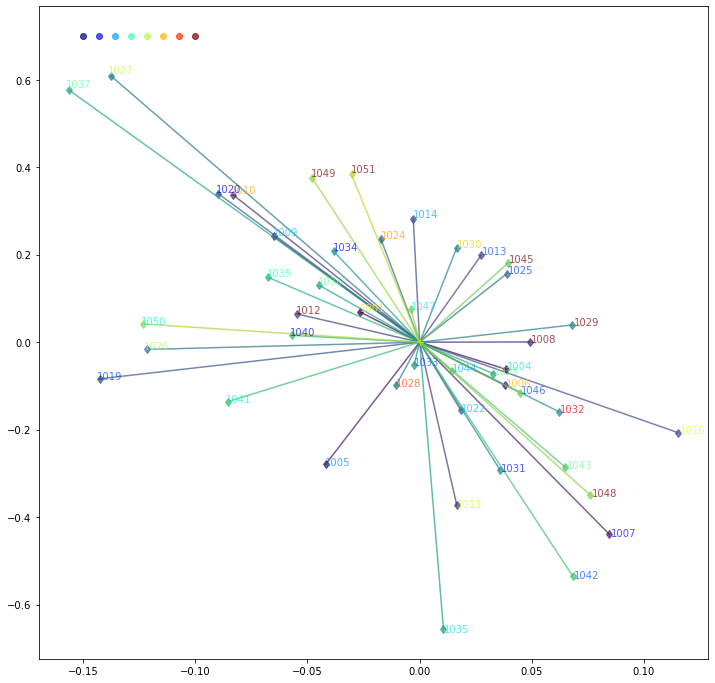

In [36]:
clr = lambda x: cm.viridis(x,0.7)
clrj = lambda x: cm.jet(x,0.7)

diff = lambda v: (0,v[1]-v[0])
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    
    plt.plot(diff(x),diff(y) ,'-', color=clr(i/50))
    plt.plot(0,0,'+',color=clr(i/50.))
    plt.plot(diff(x)[1],diff(y)[1],'d', color=clr(i/50.))
    plt.text(diff(x)[1]*1.01, diff(y)[1]*1.01,str(gr_id),fontdict={'color': clrj(drum_score_by_group[gr_id]['drumming_group_score']*1.5)})
for r in np.linspace(0,1,8):
    plt.plot(-0.15+r*0.05,0.7,'o',color=clrj(r))

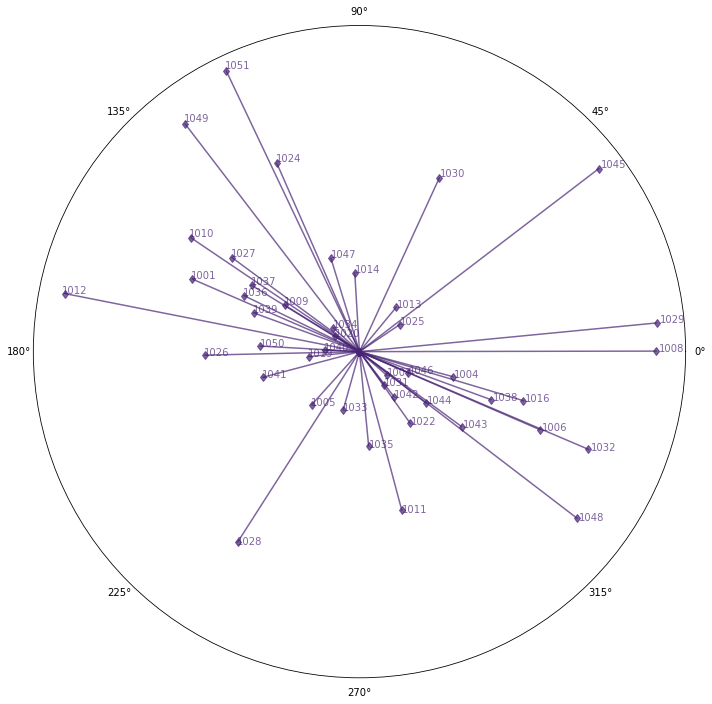

In [69]:
clr = lambda x: cm.viridis(x,0.7)
clrj = lambda x: cm.jet(x,0.7)

diff = lambda v: (0,v[1]-v[0])
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    m = drum_score_by_group[gr_id]['drumming_group_score']
    theta = np.arctan2(diff(y)[1]/6,diff(x)[1])
    r = np.linalg.norm([diff(x)[1],diff(y)[1]])
    #plt.plot(diff(x),diff(y) ,'-', color=clr(i/50))
    #plt.plot(0,0,'+',color=clr(i/50.))
    plt.polar([theta,theta],[0,m],'d-', color=clr(0.1))
    plt.grid(False)
    plt.text(theta, m*1.01,str(gr_id),fontdict={'color': clr(0.1)})
    plt.gca().set(yticklabels=[])
#for t in np.linspace(0,1,8):
#    plt.polar(t+3, 0.6,'o',color=clrj(t))

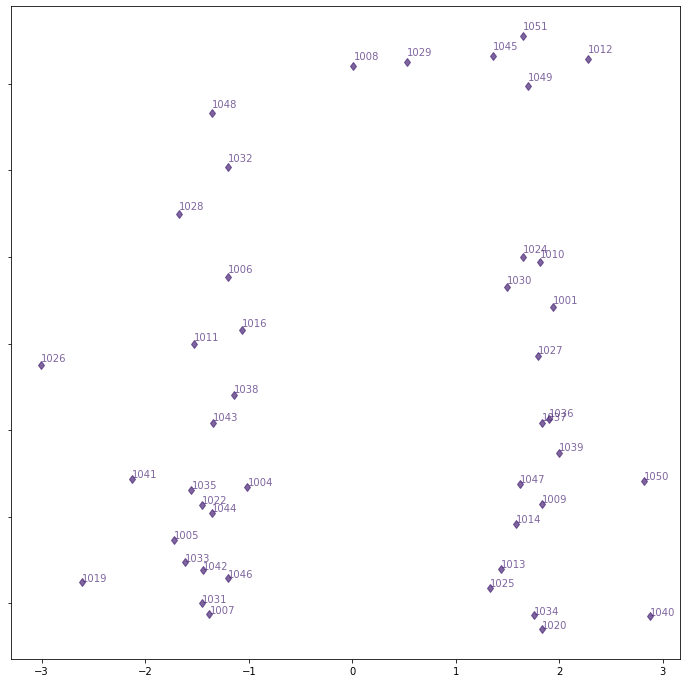

In [73]:
clr = lambda x: cm.viridis(x,0.7)
clrj = lambda x: cm.jet(x,0.7)

diff = lambda v: (0,v[1]-v[0])
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    m = drum_score_by_group[gr_id]['drumming_group_score']
    theta = np.arctan2(diff(y)[1],diff(x)[1])
    r = np.linalg.norm([diff(x)[1],diff(y)[1]])
    #plt.plot(diff(x),diff(y) ,'-', color=clr(i/50))
    #plt.plot(0,0,'+',color=clr(i/50.))
    plt.plot(theta,m,'d', color=clr(0.1))
    plt.grid(False)
    plt.text(theta, m*1.01,str(gr_id),fontdict={'color': clr(0.1)})
    plt.gca().set(yticklabels=[])
#for t in np.linspace(0,1,8):
#    plt.polar(t+3, 0.6,'o',color=clrj(t))

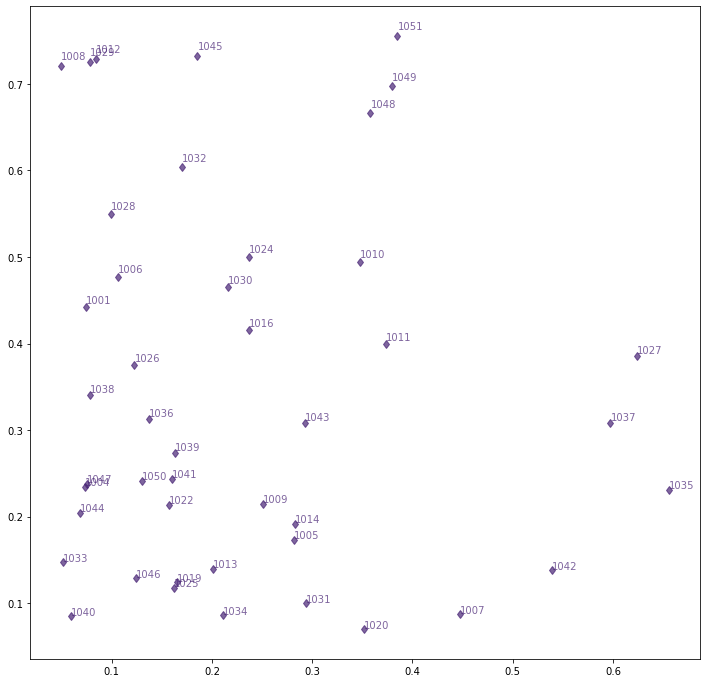

In [75]:
clr = lambda x: cm.viridis(x,0.7)
clrj = lambda x: cm.jet(x,0.7)

diff = lambda v: (0,v[1]-v[0])
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    m = drum_score_by_group[gr_id]['drumming_group_score']
    theta = np.arctan2(diff(y)[1],diff(x)[1])
    r = np.linalg.norm([diff(x)[1],diff(y)[1]])
    #plt.plot(diff(x),diff(y) ,'-', color=clr(i/50))
    #plt.plot(0,0,'+',color=clr(i/50.))
    plt.plot(r,m,'d', color=clr(0.1))
    plt.grid(False)
    plt.text(r, m*1.01,str(gr_id),fontdict={'color': clr(0.1)})
    #plt.gca().set(yticklabels=[])
#for t in np.linspace(0,1,8):
#    plt.polar(t+3, 0.6,'o',color=clrj(t))

In [44]:
theta

94.52160381231421

In [32]:
print(cm.jet(0.,0.7))
print(cm.jet(0.5,0.7))
print(cm.jet(1.,0.7))

(0.0, 0.0, 0.5, 0.7)
(0.4901960784313725, 1.0, 0.4775458570524984, 0.7)
(0.5, 0.0, 0.0, 0.7)


In [77]:
two_session_data_by_group =[
    (gr_id,dat.sessions[1], dat.sessions[3]) 
    for gr_id,dat 
    in zip(svdata.group_id,svdata.coupling_2d.remez.tolist()) 
    if dat is not None

]

In [82]:
list(filter(lambda x: x[0]==1023, two_session_data_by_group))

[(1023, [0.260904007261578, 1.2131549958501815], None)]

In [83]:
list(filter(lambda x: x[0]==1009, two_session_data_by_group))

[(1009,
  [0.4578990845316076, 1.052378556778532],
  [0.3930193615969861, 1.294322822987879])]

In [84]:
list(filter(lambda x: x[0]==1026, two_session_data_by_group))

[(1026,
  [0.41632325828416117, 1.1817438109743597],
  [0.2948224447756941, 1.1651451009468259])]